In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
import numpy as np

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline

In [2]:
uni_df= pd.read_csv("unifed_csv.csv")

In [3]:
uni_df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 159 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   company_uuid                     37198 non-null  object 
 1   company_name                     347 non-null    object 
 2   region                           33609 non-null  object 
 3   top_100_invested                 2544 non-null   float64
 4   status                           37198 non-null  object 
 5   category_groups_list             37198 non-null  object 
 6   num_funding_rounds               12036 non-null  float64
 7   total_funding_usd                9093 non-null   float64
 8   founded_on                       37198 non-null  float64
 9   last_funding_on                  12032 non-null  object 
 10  closed_on                        591 non-null    object 
 11  employee_count                   37198 non-null  object 
 12  primary_role     

In [4]:
uni_df["private_equity"].value_counts()

0.0    37139
1.0       45
2.0       12
3.0        2
Name: private_equity, dtype: int64

In [5]:
features= uni_df[["company_uuid", "top_100_invested", "total_funding_usd", "ipo_valuation_price_usd","funds_raised_amount_usd","acquisitions_price_usd", "degree_type", "first_fund_raised","latest_investment", "debt_financing", "pre_seed",  "private_equity", "average_momentum"  ]]
features["top_100_invested"]= features["top_100_invested"].fillna(0)
features["total_funding_usd"]= features["total_funding_usd"].fillna(0)
features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_uuid             37198 non-null  object 
 1   top_100_invested         37198 non-null  float64
 2   total_funding_usd        37198 non-null  float64
 3   ipo_valuation_price_usd  37198 non-null  float64
 4   funds_raised_amount_usd  37198 non-null  float64
 5   acquisitions_price_usd   37198 non-null  float64
 6   degree_type              37198 non-null  float64
 7   first_fund_raised        37198 non-null  float64
 8   latest_investment        37198 non-null  float64
 9   debt_financing           37198 non-null  float64
 10  pre_seed                 37198 non-null  float64
 11  private_equity           37198 non-null  float64
 12  average_momentum         37198 non-null  float64
dtypes: float64(12), object(1)
memory usage: 3.7+ MB


Total funding usd

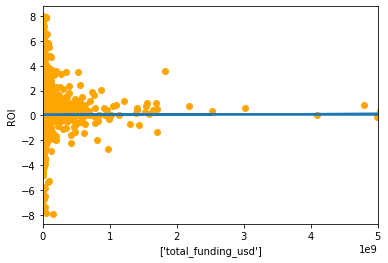

In [6]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["total_funding_usd"]]
y = features["average_momentum"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=20)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
plt.xlim([0,5000000000])
plt.plot(x, y_pred)

ipo_valuation_price_usd

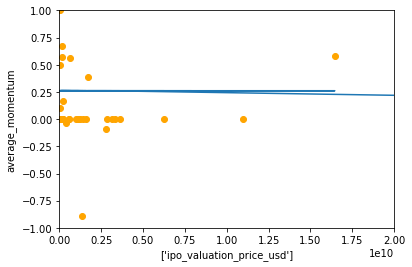

In [7]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["ipo_valuation_price_usd"]]
x=x[x["ipo_valuation_price_usd"]!=0]
y = features[["ipo_valuation_price_usd", "average_momentum"]]
y=y[y["ipo_valuation_price_usd"]!=0]
y=y.drop(columns=["ipo_valuation_price_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,20000000000])
plt.ylim([-1,1])
plt.plot(x, y_pred)

funds_raised_amount_usd

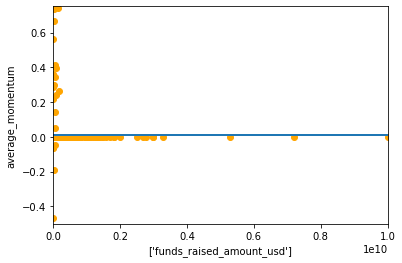

In [8]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["funds_raised_amount_usd"]]
x=x[x["funds_raised_amount_usd"]!=0]
y = features[["funds_raised_amount_usd", "average_momentum"]]
y=y[y["funds_raised_amount_usd"]!=0]
y=y.drop(columns=["funds_raised_amount_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,10000000000])
plt.ylim([-0.5,0.75])
plt.plot(x, y_pred)

acquisitions_price_usd

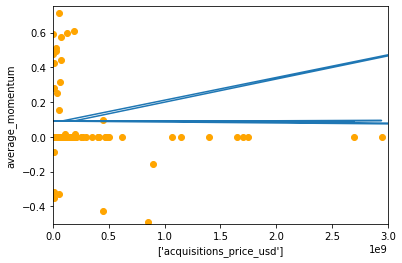

In [9]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["acquisitions_price_usd"]]
x=x[x["acquisitions_price_usd"]!=0]
y = features[["acquisitions_price_usd", "average_momentum"]]
y=y[y["acquisitions_price_usd"]!=0]
y=y.drop(columns=["acquisitions_price_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,3000000000])
plt.ylim([-0.5,0.75])
plt.plot(x, y_pred)

first_fund_raised

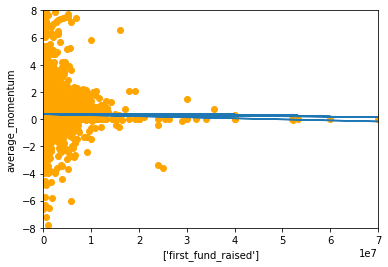

In [10]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["first_fund_raised"]]
x=x[x["first_fund_raised"]!=0]
y = features[["first_fund_raised", "average_momentum"]]
y=y[y["first_fund_raised"]!=0]
y=y.drop(columns=["first_fund_raised"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,70000000])
plt.ylim([-8,8])
plt.plot(x, y_pred)